# Gradient Boosting

Gradient Boosting one of the types of boosting algorithms which works by computing the residuals of each tree's prediction and then sum all the residuals to score the best model. The implementation is simple and straight forward and self-explanatory. First gradient boosting has been implemented partially from scratch then other models are also show for comparison. The learning curve have been plotted to understand teh working better.

In [242]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

In [194]:
df = sns.load_dataset("mpg")
df.drop(columns=["name"],inplace=True)
df.dropna(inplace=True)
df=pd.get_dummies(df,columns=["origin"],drop_first=True)

X = df.drop(columns="mpg")
y = df["mpg"]
X_train, X_test, y_train , y_test = train_test_split(X,y,train_size=0.8)

In [198]:
class GradientBoosting:
    def __init__(self,n_estimators,learning_rate):
        self.n_estimators=n_estimators
        self.models=[]
        self.residuals=[]
        self.path=[]
        self.learning_rate = learning_rate

    def fit(self,X_train,y_train):
        resid =y_train.copy()
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=1)
            tree.fit(X_train,resid)
            pred = tree.predict(X_train)
            resid -= self.learning_rate * pred
            self.models.append(tree)
            self.residuals.append(np.mean(resid))
            self.path.append((i, self.residuals[-1]))
            print(f"for estimator = {i} residual mean is {np.mean(resid):.17f})")

    def predict(self,X_test):
        final_pred = np.zeros(len(X_test))
        for tree in self.models:
            final_pred += self.learning_rate * tree.predict(X_test)
        return final_pred

In [203]:
rg = GradientBoosting(120,1)
rg.fit(X_train,y_train)

for estimator = 0 residual mean is 0.00000000000000518)
for estimator = 1 residual mean is 0.00000000000000425)
for estimator = 2 residual mean is -0.00000000000000166)
for estimator = 3 residual mean is 0.00000000000000118)
for estimator = 4 residual mean is 0.00000000000000177)
for estimator = 5 residual mean is 0.00000000000000066)
for estimator = 6 residual mean is -0.00000000000000098)
for estimator = 7 residual mean is -0.00000000000000020)
for estimator = 8 residual mean is -0.00000000000000017)
for estimator = 9 residual mean is 0.00000000000000035)
for estimator = 10 residual mean is -0.00000000000000089)
for estimator = 11 residual mean is 0.00000000000000024)
for estimator = 12 residual mean is 0.00000000000000011)
for estimator = 13 residual mean is -0.00000000000000012)
for estimator = 14 residual mean is -0.00000000000000001)
for estimator = 15 residual mean is -0.00000000000000002)
for estimator = 16 residual mean is 0.00000000000000014)
for estimator = 17 residual mean 

for estimator = 0 residual mean is 0.00000000000000163)
for estimator = 1 residual mean is 0.00000000000000372)
for estimator = 2 residual mean is -0.00000000000000077)
for estimator = 3 residual mean is -0.00000000000000218)
for estimator = 4 residual mean is 0.00000000000000008)
for estimator = 5 residual mean is 0.00000000000000195)
for estimator = 6 residual mean is -0.00000000000000057)
for estimator = 7 residual mean is 0.00000000000000010)
for estimator = 8 residual mean is -0.00000000000000005)
for estimator = 9 residual mean is 0.00000000000000010)
for estimator = 10 residual mean is -0.00000000000000033)
for estimator = 11 residual mean is -0.00000000000000011)
for estimator = 12 residual mean is 0.00000000000000022)
for estimator = 13 residual mean is 0.00000000000000001)
for estimator = 14 residual mean is -0.00000000000000002)
for estimator = 15 residual mean is -0.00000000000000010)
for estimator = 16 residual mean is -0.00000000000000002)
for estimator = 17 residual mean

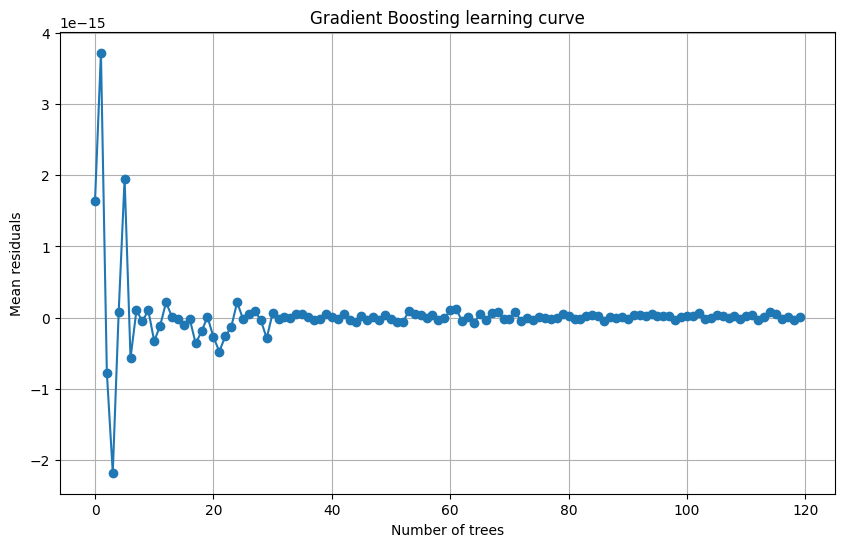

In [212]:
rg = GradientBoosting(120,1)
rg.fit(X_train,y_train)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

path = np.array(rg.path)
iterations = path[:,0]
residuals = path[:,1]

plt.plot(iterations,residuals,marker="o",linestyle='-')
plt.xlabel("Number of trees")
plt.ylabel("Mean residuals")
plt.title("Gradient Boosting learning curve")
ax.grid(True)
plt.show()

for estimator = 0 residual mean is 23.22140575079871994)
for estimator = 1 residual mean is 23.22140575079871994)
for estimator = 2 residual mean is 23.22140575079871994)
for estimator = 3 residual mean is 23.22140575079871994)
for estimator = 4 residual mean is 23.22140575079871994)
for estimator = 5 residual mean is 23.22140575079871994)
for estimator = 6 residual mean is 23.22140575079871994)
for estimator = 7 residual mean is 23.22140575079871994)
for estimator = 8 residual mean is 23.22140575079871994)
for estimator = 9 residual mean is 23.22140575079871994)
for estimator = 10 residual mean is 23.22140575079871994)
for estimator = 11 residual mean is 23.22140575079871994)
for estimator = 12 residual mean is 23.22140575079871994)
for estimator = 13 residual mean is 23.22140575079871994)
for estimator = 14 residual mean is 23.22140575079871994)
for estimator = 15 residual mean is 23.22140575079871994)
for estimator = 16 residual mean is 23.22140575079871994)
for estimator = 17 resid

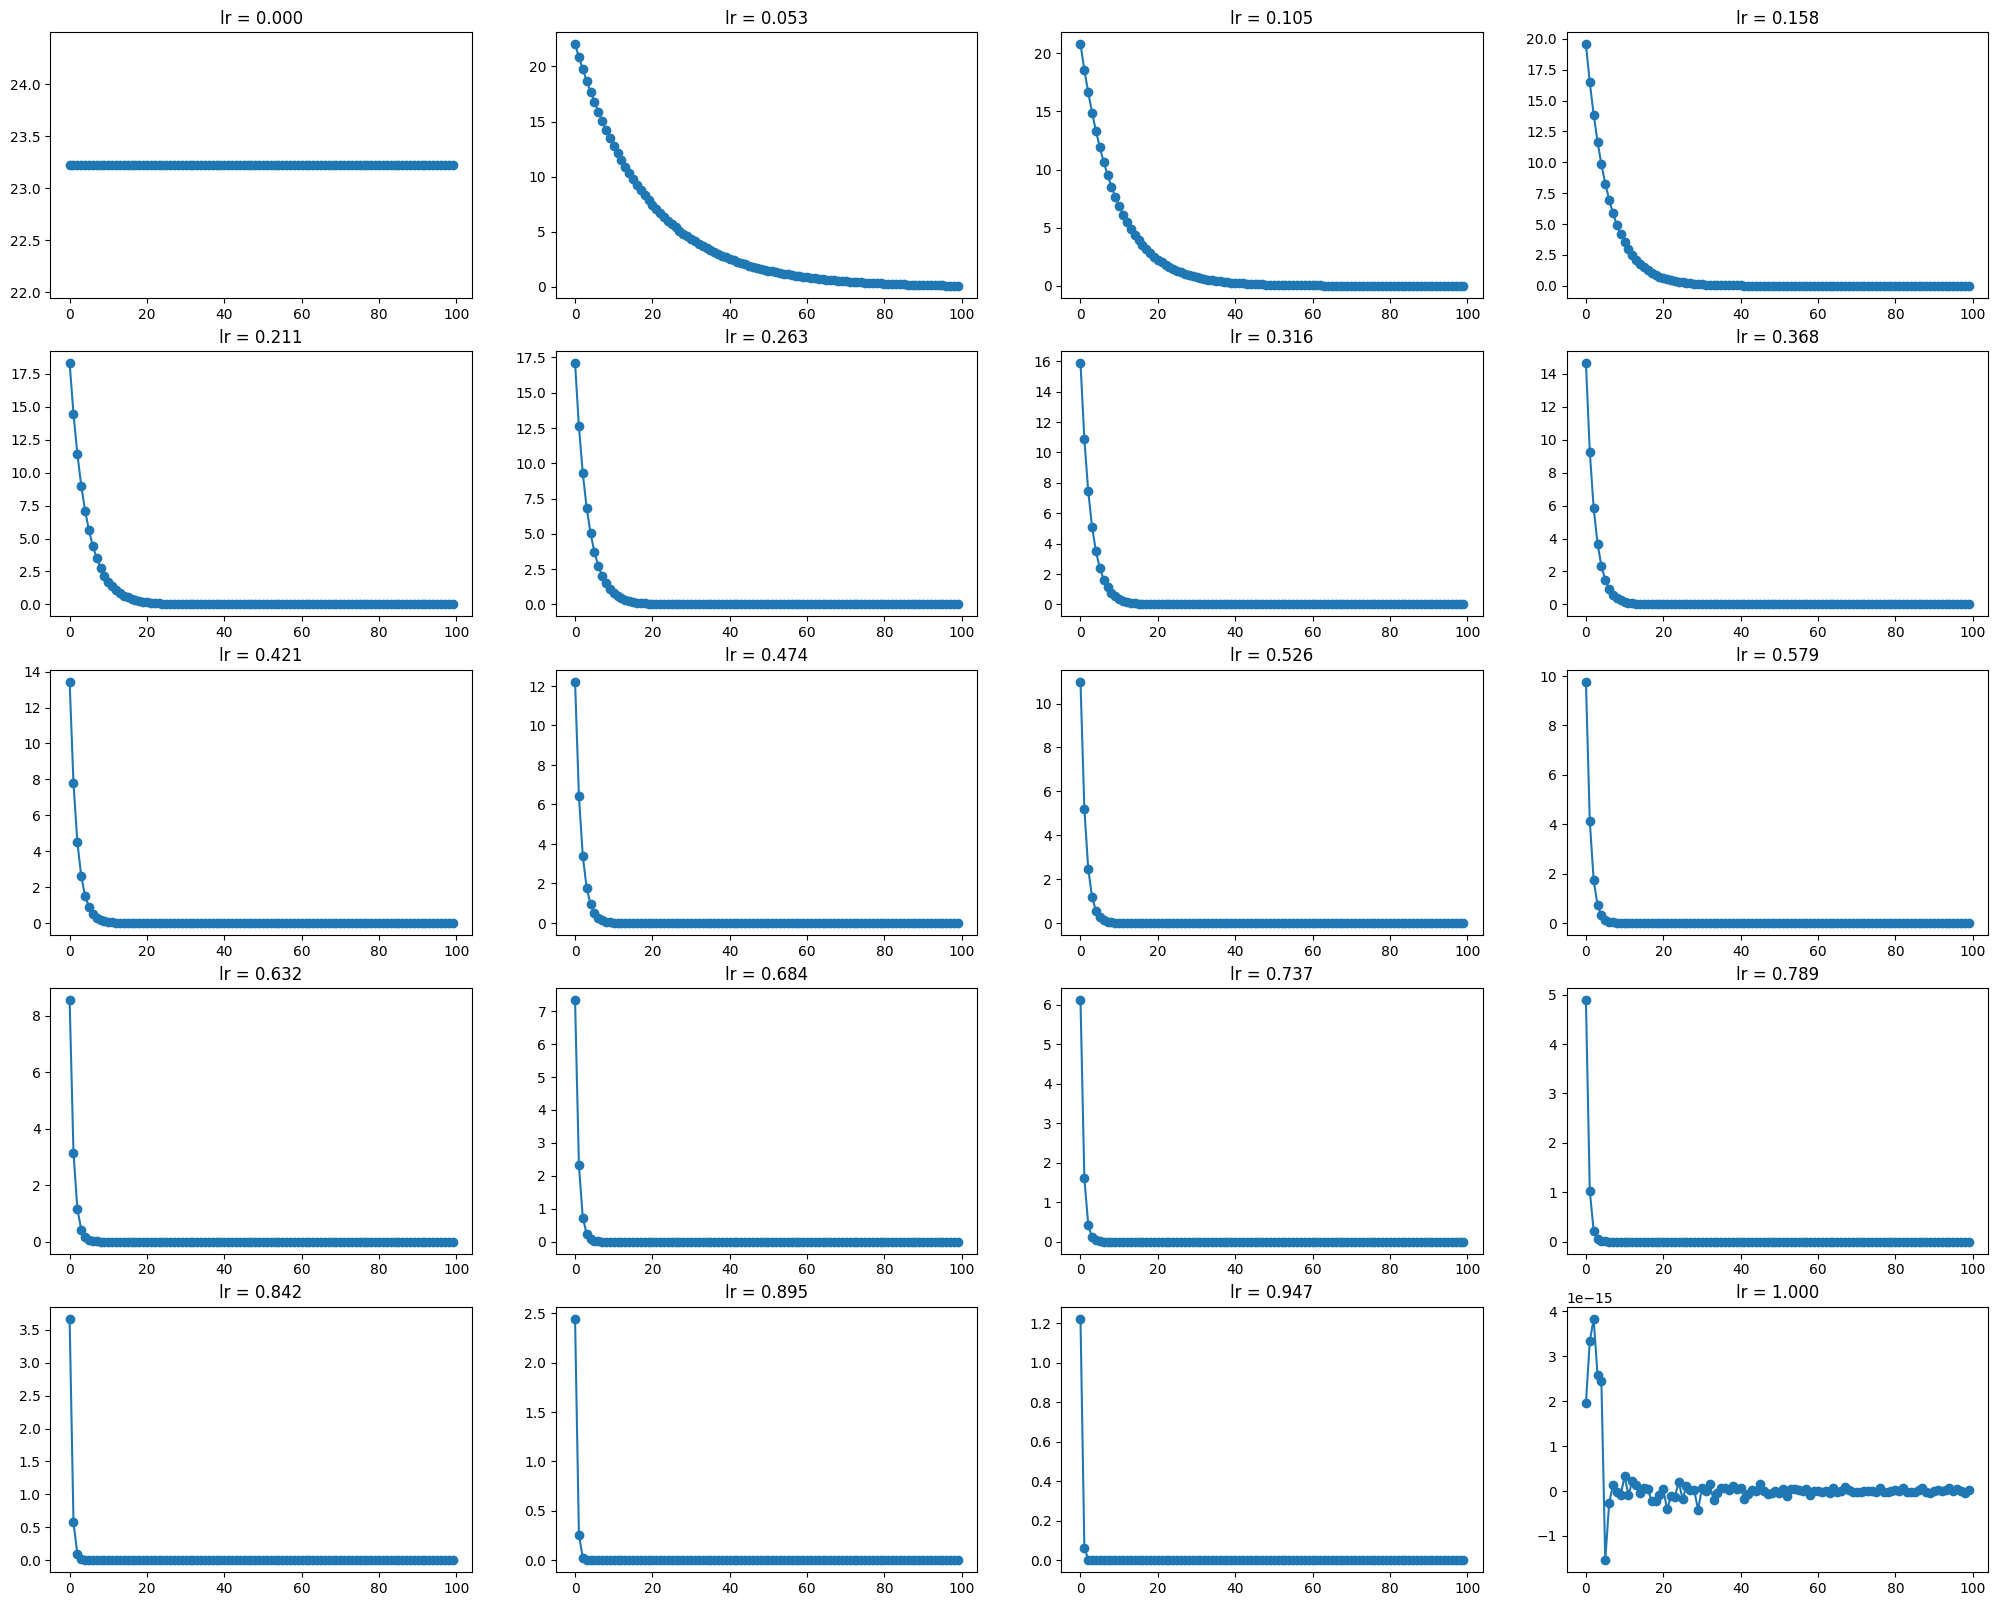

In [225]:
fig, ax = plt.subplots(5,4,figsize=(25, 20))

ax = ax.flatten()
for i,j in enumerate(np.linspace(0,1,20)):
    rg = GradientBoosting(100,j)
    rg.fit(X_train,y_train)

    path = np.array(rg.path)
    iterations = path[:,0]
    residuals = path[:,1]

    ax[i].plot(iterations,residuals,marker="o",linestyle='-')
    ax[i].set_title(f"lr = {j:.3f}")
plt.show()

In [227]:
rg = GradientBoosting(100,0.1)
rg.fit(X_train,y_train)
root_mean_squared_error(y_test,rg.predict(X_test))

for estimator = 0 residual mean is 20.89926517571884901)
for estimator = 1 residual mean is 18.80933865814696659)
for estimator = 2 residual mean is 16.92840479233226958)
for estimator = 3 residual mean is 15.23556431309904546)
for estimator = 4 residual mean is 13.71200788178913754)
for estimator = 5 residual mean is 12.34080709361022699)
for estimator = 6 residual mean is 11.10672638424920144)
for estimator = 7 residual mean is 9.99605374582428041)
for estimator = 8 residual mean is 8.99644837124185237)
for estimator = 9 residual mean is 8.09680353411766873)
for estimator = 10 residual mean is 7.28712318070590115)
for estimator = 11 residual mean is 6.55841086263530926)
for estimator = 12 residual mean is 5.90256977637177904)
for estimator = 13 residual mean is 5.31231279873460327)
for estimator = 14 residual mean is 4.78108151886114285)
for estimator = 15 residual mean is 4.30297336697502875)
for estimator = 16 residual mean is 3.87267603027752605)
for estimator = 17 residual mean i

2.8999715190749895

In [228]:
model = LinearRegression()
model.fit(X_train,y_train)
root_mean_squared_error(y_test,model.predict(X_test))

3.030977017105809

In [238]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=2,n_estimators=100,learning_rate=0.1)
gb.fit(X_train,y_train)
pred = gb.predict(X_test)
root_mean_squared_error(y_test,pred)

2.698866633179515

In [248]:
params = {
    'subsample':[0.65,0.7,0.75],
    'n_estimators':[300,500],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[1,2,3]
}

model = GradientBoostingRegressor()
grid = RandomizedSearchCV(model,params,n_iter=10,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print(grid.best_params_)

print("train score:",np.sqrt(-grid.best_score_))
best_model=grid.best_estimator_
print("test score:",root_mean_squared_error(y_test,best_model.predict(X_test)))

{'subsample': 0.75, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
train score: 3.1374744793487417
test score: 2.5516650932235345


When a model is trained on sub sample data it is called Stocastic gradient descent